In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
file_to_load = os.path.join("weather_data" , "cities.csv")

In [3]:
# create a dataframe 
city_data_df = pd.read_csv(file_to_load)
city_data_df

,City ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Bethel,US,2022-08-02 03:19:00,41.3712,-73.4140,70.11,94,0,0.00
1,1,Upernavik,GL,2022-08-02 03:19:00,72.7868,-56.1549,44.76,73,100,3.65
2,2,Draguignan,FR,2022-08-02 03:19:01,43.5333,6.4667,71.01,75,21,2.30
3,3,Kukushtan,RU,2022-08-02 03:19:01,57.6464,56.4952,60.42,72,35,5.73
4,4,Sola,VU,2022-08-02 03:19:02,-13.8833,167.5500,80.71,78,15,16.42
...,...,...,...,...,...,...,...,...,...,...
585,585,Jadu,LY,2022-08-02 03:35:01,31.9530,12.0261,71.62,50,1,3.33
586,586,Tahe,CN,2022-08-02 03:35:01,52.3333,124.7333,80.78,45,25,5.82
587,587,Torit,SS,2022-08-02 03:35:02,4.4133,32.5678,66.83,97,100,2.44
588,588,Jiuquan,CN,2022-08-02 03:35:02,39.7432,98.5174,65.25,74,100,9.95


In [4]:
# Extract relevant data information for our plots
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [22]:
today =  time.strftime("%x")
today

'08/02/22'

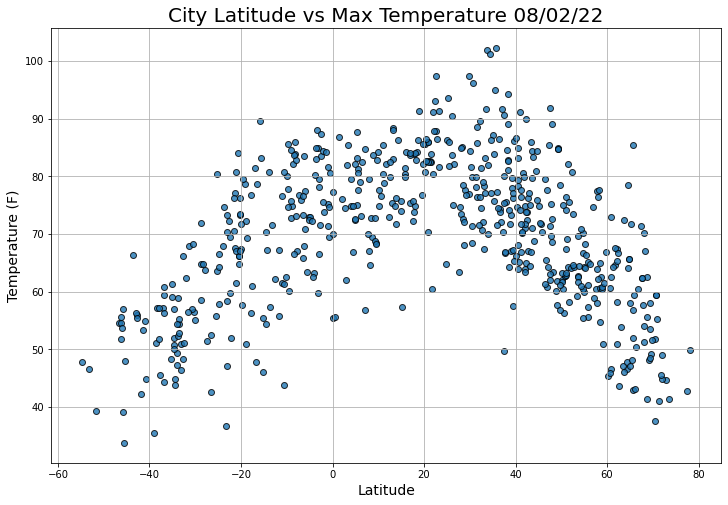

In [26]:
# plot latitude vs Temperature

plt.subplots(figsize = (12,8))
plt.scatter(lats,max_temps, marker="o", edgecolor= "black" , linewidth=1, alpha= 0.8 )
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel('Temperature (F)', fontsize = 14)
plt.title("City Latitude vs Max Temperature " + today, fontsize= 20)
plt.grid(True)
# save this figure as fig1
plt.savefig("plots/fig1.png")
plt.show()

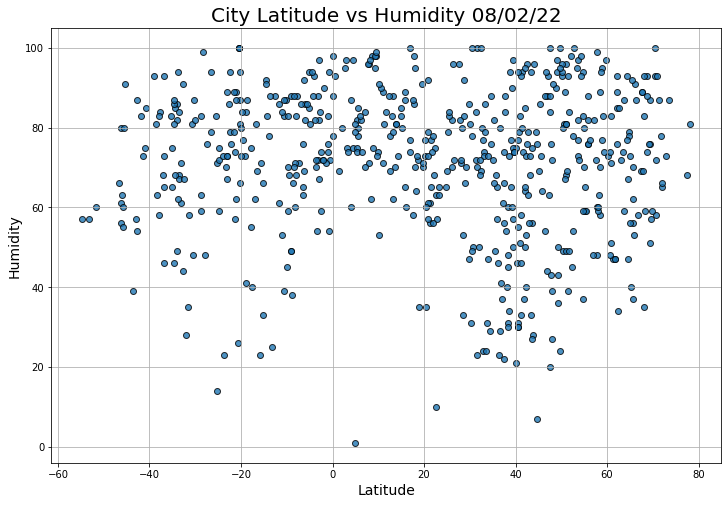

In [28]:
# plot latitude vs  Humidity
plt.subplots(figsize = (12,8))
plt.scatter(lats,humidity, marker="o", edgecolor= "black" , linewidth=1, alpha= 0.8 )
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel('Humidity', fontsize = 14)
plt.title("City Latitude vs Humidity " + today, fontsize= 20)
plt.grid(True)
# save this figure as fig1
plt.savefig("plots/fig2.png")
plt.show()

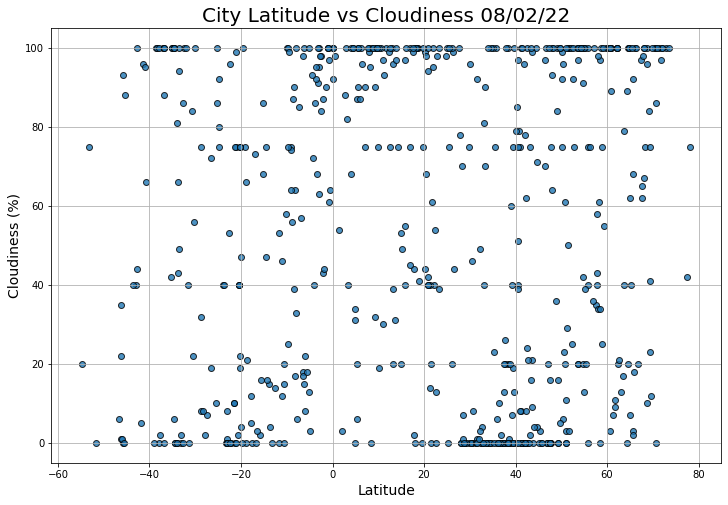

In [29]:
# plot latitude vs cloudiness
plt.subplots(figsize = (12,8))
plt.scatter(lats,cloudiness, marker="o", edgecolor= "black" , linewidth=1, alpha= 0.8 )
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel('Cloudiness (%)', fontsize = 14)
plt.title("City Latitude vs Cloudiness " + today, fontsize= 20)
plt.grid(True)
# save this figure as fig1
plt.savefig("plots/fig3.png")
plt.show()

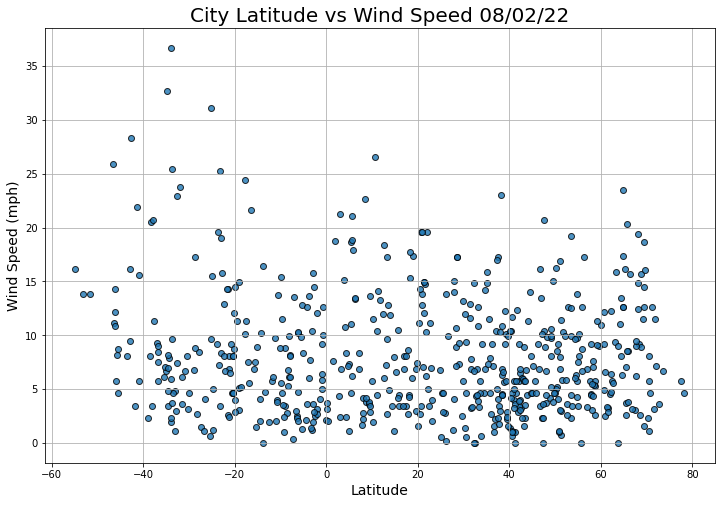

In [30]:
# plot latitude vs windspeed
plt.subplots(figsize = (12,8))
plt.scatter(lats,wind_speed, marker="o", edgecolor= "black" , linewidth=1, alpha= 0.8 )
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel('Wind Speed (mph)', fontsize = 14)
plt.title("City Latitude vs Wind Speed " + today, fontsize= 20)
plt.grid(True)
# save this figure as fig1
#plt.savefig("plots/fig4.png")
plt.show()